In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the data

In [3]:
def plot(D1,D2,region):
  df = pd.read_csv("Path to your data") # or use your dataframe
  Date = pd.date_range('2014-01-01', periods=84, freq='MS')
  df.insert(0, "Date", Date, True)
  del df['date']
  df = df.set_index('Date')
  fig, ax = plt.subplots(figsize=(15,7))
  sns.lineplot(data=df[D1:D2][region], ax=ax)
  ax.set_ylabel('SOL',fontsize=20)
  ax.set_xlabel('Date',fontsize=20)
  ax.set_title('Monthly Sum Of Lights (SOL) for : {}'.format(region),fontsize=20);

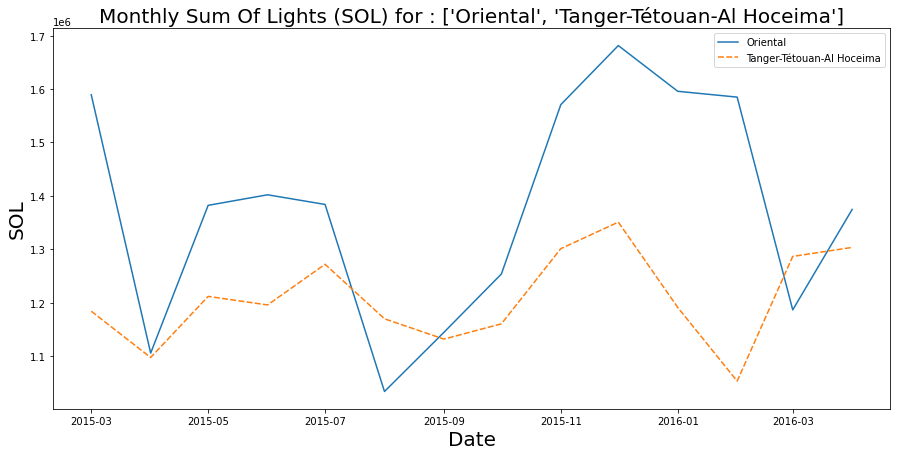

In [4]:
#example
plot("2015-02-04","2016-04-05",["Oriental","Tanger-Tétouan-Al Hoceima"])

# Subset the data

In [5]:
def gendata_csv(D1,D2,region):
  df = pd.read_csv("Path to your data", index_col = 0) # or use your dataframe
  Date = pd.date_range('2014-01-01', periods=84, freq='MS')
  df.insert(0, "Date", Date, True)
  del df['date']
  df = df.set_index('Date')
  data=df[D1:D2][region]
  data.to_csv(r"Path to your folder")

def gendata_xlsx(D1,D2,region):
  df = pd.read_csv("Path to your data", index_col = 0) # or use your dataframe
  Date = pd.date_range('2014-01-01', periods=84, freq='MS')
  df.insert(0, "Date", Date, True)
  del df['date']
  df = df.set_index('Date')
  data=df[D1:D2][region]
  data.to_excel(r"Path to your folder", header=True)

def gendata_format(D1,D2,region,format):
  if format == "xlsx":
    gendata_xlsx(D1,D2,region)
  else:
    gendata_csv(D1,D2,region)

In [ ]:
#example
gendata_format("2015-02-04","2018-04-05",["Oriental","Tanger-Tétouan-Al Hoceima","Fès-Meknès"],"csv")

# Subset and Plot your data

In [ ]:
def sun_plot(D1,D2,region,format):
  plot(D1,D2,region)
  gendata_format(D1,D2,region,format)

# Delete observations of some months for reasons of contamination or .... (Cas du mois de juin pour le maroc dans le cas de l'utilisation d'une base de données autre que "Corrected Nighttime Day/Night Band")


In [ ]:
#Retirer un mois: 0 pour janvier et 11 pour décembre
def drop_obs(n):
    s = n
    L = []
    while s < 78:
        L.append(s)
        s=s+12
    return L
        
def drop_a_month(L):
   df = pd.read_csv("Path to your data", index_col = 0) # or use your dataframe
   Date = pd.date_range('2014-01-01', periods=84, freq='MS')
   df.insert(0, "Date", Date, True)
   del df['date']
   return df
   df = df.set_index('Date')
   df =df.drop(labels=L, axis=0)
   return df

# Aggregate the data by quarter or year

In [8]:
def agreg_data_drop_juin(freq):  # freq = Q or Y
    df = pd.read_csv("Path to your data", index_col = 0) # or use your dataframe
   #Date = pd.date_range('2014-01-01', periods=84, freq='MS') #creat an index for your data
   #df.insert(0, "Date", Date, True)  #inser your index in the dataframe
   #del df['date']  #detele a column
   #df = df.set_index('Date')  # set the new index
    df_agg = df
    df_agg = df_.set_index('Date').resample(freq).mean().reset_index()  # Aggregate by Q or Y
    return df_agg 

# Sum Of light du Maroc

In [ ]:
Data = pd.read_csv("Path to your data") # or use your dataframe
Data['Morocco'] = Data.sum(axis=1)
cols = list(Data.columns)
cols = [cols[-1]] + cols[:-1]
Data = Data[cols]